In [43]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
from configuration import ROOT_DIR

In [46]:
inference_path = ROOT_DIR/"__inference_comparison"
inference_path_str = str(inference_path)

In [54]:
# Generate a few images
# !python infer.py -e 1004 2000 -o $inference_path_str -t restored --size "512,512 256,256 128,128" --std-dev "40,40" -n 1


In [ ]:
!python infer.py -e 1004 2000 -o $inference_path_str -t metrics --size "512,512 256,256 128,128" --std-dev "1,1 5,5 10,10 20,20 30,30 40,40 50,50 80,80" -n 5
# Note ! we could call python directly instead of using command line

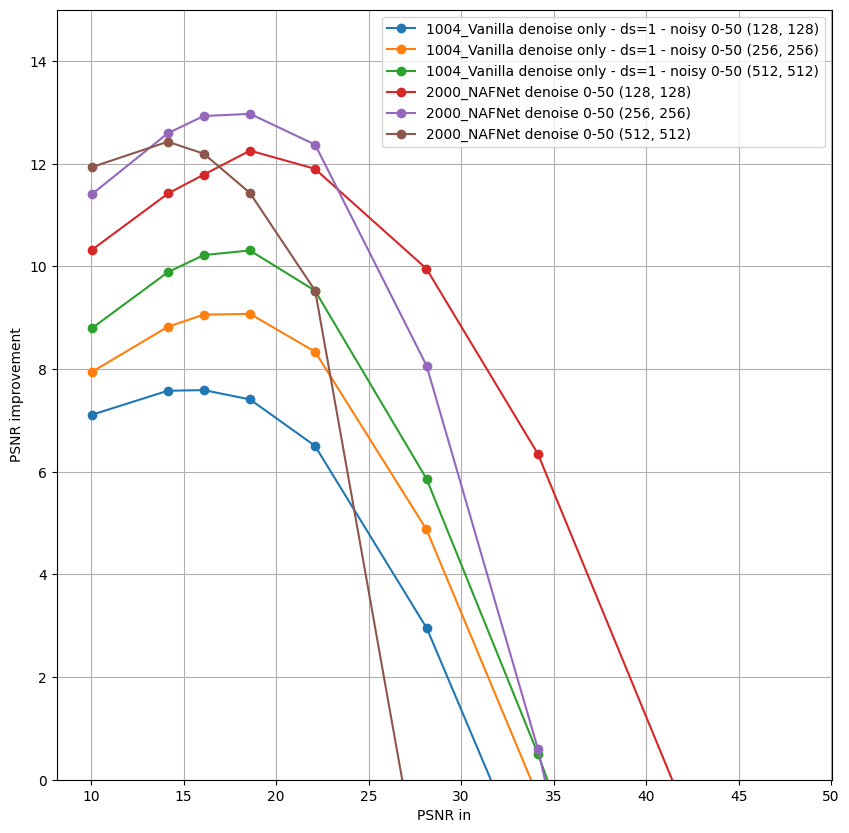

In [52]:
selected_paths = [
    (inference_path/"1004_Vanilla denoise only - ds=1 - noisy 0-50", "*0128*.csv"),
    (inference_path/"1004_Vanilla denoise only - ds=1 - noisy 0-50", "*0256*.csv"),
    (inference_path/"1004_Vanilla denoise only - ds=1 - noisy 0-50", "*0512*.csv"),
    (inference_path/"2000_NAFNet denoise 0-50", "*0128*.csv"),
    (inference_path/"2000_NAFNet denoise 0-50","*0256*.csv"),
    (inference_path/"2000_NAFNet denoise 0-50","*0512*.csv"),
]
plt.figure(figsize=(10, 10))
for selected_path, selected_regex in selected_paths:
    selected_path = Path(selected_path)
    assert selected_path.exists()
    results_path = sorted(list(selected_path.glob(selected_regex)))
    stats = []
    for result_path in results_path:
        df = pd.read_csv(result_path)
        # print(df.head())
        in_psnr = df["in_PSNR"].mean()
        out_psnr = df["out_PSNR"].mean()
        stats.append({
            "in_psnr": in_psnr,
            "out_psnr": out_psnr,
        })
        title = selected_path.name + " " + df["size"][0]
    stats_array = pd.DataFrame(stats)
    # print(stats_array)
    # plt.plot(stats_array["in_psnr"], stats_array["out_psnr"], label=selected_path.name)
    plt.plot(
        stats_array["in_psnr"],
        stats_array["out_psnr"]-stats_array["in_psnr"],
        "-o",
        label=title
    )
        # label=selected_path.name)
    plt.xlabel("PSNR in")
    plt.ylabel("PSNR improvement")
    plt.ylim(0, 15)
plt.legend()
plt.grid()
plt.show()